<center><img src="https://github.com/DACSS-CSSmeths/guidelines/blob/main/pics/small_logo_ccs_meths.jpg?raw=true" width="700"></center>





<a target="_blank" href="https://colab.research.google.com/github/DACSS-CSSmeths/Networks_intro/blob/main/index.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# Graphs

Let me show you a graph (from [wikipedia](https://en.wikipedia.org/wiki/Graph_(discrete_mathematics))):

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5b/6n-graf.svg/440px-6n-graf.svg.png"/>

As you can see, it is simply a representation of two sets:

1. A set of **vertices** or **nodes**. In the image above you see the nodes _1_, _2_, _3_, _4_, _5_, and _6_.
2. A set of **edges** or **links**. In the image above, the links are connecting pairs of nodes. 

Altogether, a _graph_ reveals some _relationship_ among the _nodes_. The graph structure will allow us to explore and understand that relationship. 

## Creating Graphs

The graph above can be represented computationally in Python using **networkx**:

In [1]:
import networkx as nx

# create graph
G = nx.Graph()

# the list of edges, edges as tuples
listOfEdges=[(1, 2), (1, 5),(2,5),(2,3),(3,4),(4,5),(4,6)]

# create nodes and edges
G.add_edges_from(listOfEdges)

The las code chunk created your first graph!

## Basic Elements

**G** is the  object:

In [2]:
#you don't see much...just what it is:
G

In [3]:
# You see nodes and their attributes (nothing yet)
G.nodes.data()

NodeDataView({1: {}, 2: {}, 5: {}, 3: {}, 4: {}, 6: {}})

In [4]:
# You just see node ids
G.nodes()

NodeView((1, 2, 5, 3, 4, 6))

In [5]:
# You see edges
G.edges()

EdgeView([(1, 2), (1, 5), (2, 5), (2, 3), (5, 4), (3, 4), (4, 6)])

In [6]:
# You see edges and their attributes (nothing yet)
G.edges.data()

EdgeDataView([(1, 2, {}), (1, 5, {}), (2, 5, {}), (2, 3, {}), (5, 4, {}), (3, 4, {}), (4, 6, {})])

## Drawing

As you can see, the graph is created by adding pairs of nodes. Once you complete that stage, you can draw the graph:

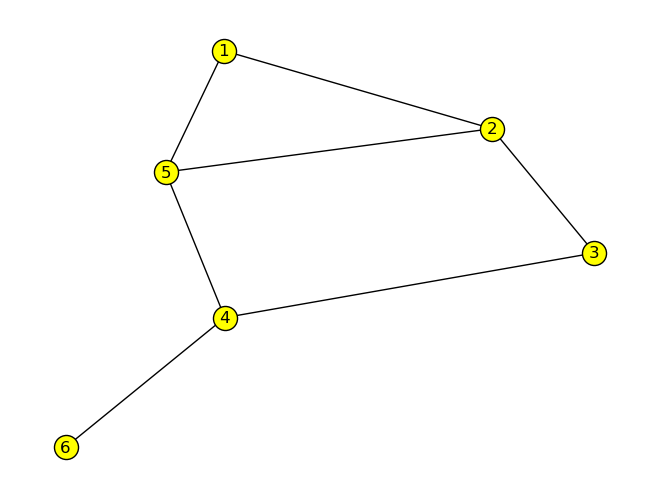

In [7]:
# draw
nx.draw(G=G,
        with_labels=True,
        node_color='yellow',
        edgecolors='black')



## Directed Graphs

The graph we created and drew represented an **undirected** graph, that is, the relationships between a pair of nodes are **symmetric**: the relationships can not represent direction because they are _inherently mutual_ between the nodes. For example, the relationship *to be a neighbor of* is symmetric.

The following graph is **directed** (also from wikipedia):

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/23/Directed_graph_no_background.svg/340px-Directed_graph_no_background.svg.png"/>


You can create this directed graph this way:

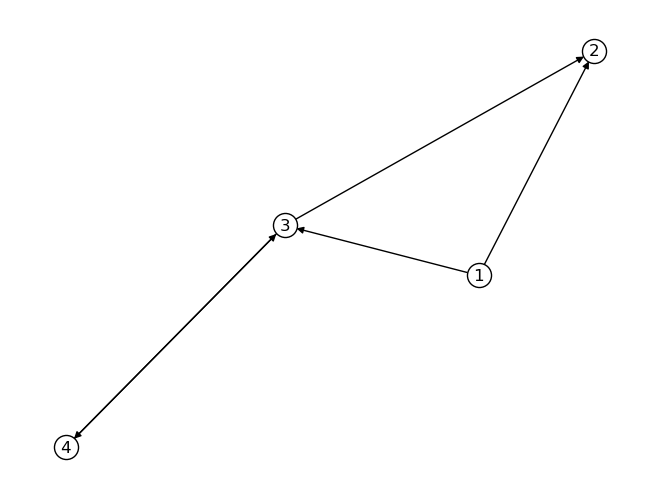

In [8]:
# create DIRECTED graph
dG = nx.DiGraph()

# create nodes and edges
dG.add_edges_from([(1, 2), (1, 3),(3,2),(3,4),(4,3)])

# drawing
nx.draw(dG,with_labels=True,node_color='white',edgecolors='black')

Directed links are also called **arcs**. Notice the _DiGraph_ created represents an **asymmetric** relationship: the relationship a node has with another node does not need to be mutual, but could be (see nodes _3_ and _4_). If the arcs represent **cares for someone**, it shows that the feeling is not reciprocal for most cases in this graph. If a relationship is not mutual, and can only be in one direction, it is called **anti symmetric** (be "a parent of" belongs to this kind).

## Attributes

Nodes can have attributes. This is how you add attributes manually:

In [9]:
# adding attributes, just female/male for simplicity
dG.nodes[1]["sex"]='male'
dG.nodes[2]["sex"]='female'
dG.nodes[3]["sex"]='female'
dG.nodes[4]["sex"]='male'

In [10]:
# seeing attributes
nx.get_node_attributes(dG, "sex")

{1: 'male', 2: 'female', 3: 'female', 4: 'male'}

Notice the above structure is a Python dictionary, {'key':'value'}.
Python dictionaries are important for network data management. Here, for example, the node is the key, and the attribute is the value. Knowing how to **build** a dictionary is needed to add attributes via coding, instead of manually as we did above.

Above, we had few nodes, so we added an attribute node by node. Let me set the color of the node based on _sex_, this time NOT manually:

* using **items()**: This will help you create a dictionary (dict):

In [11]:
# requesting attribute as "items"
nx.get_node_attributes(dG, "sex").items()

dict_items([(1, 'male'), (2, 'female'), (3, 'female'), (4, 'male')])

* create a dictionary using **comprehensions**:

In [12]:
# assigning color condtionally to sex
# write 'red' as value for  'node', if the 'sex' of 'node' is 'female', else, write 'blue'
# do this for every pair 'node','sex' in 'nx.get_node_attributes(dG, "sex").items()'
{node:'red' if sex=='female' else 'blue' for node,sex in nx.get_node_attributes(dG, "sex").items()}

{1: 'blue', 2: 'red', 3: 'red', 4: 'blue'}

And that is how we built a dict.

* Now, use the dict to add the attribute:

In [13]:
# dict saved a 'colorDict'
colorNodes={node:'red' if sex=='female' else 'blue' for node,sex in nx.get_node_attributes(dG, "sex").items()}

# use 'colorNodes' to create attribute "color"
nx.set_node_attributes(dG, colorNodes, "color")

# the attribute is now in the node data:
dG.nodes.data()

NodeDataView({1: {'sex': 'male', 'color': 'blue'}, 2: {'sex': 'female', 'color': 'red'}, 3: {'sex': 'female', 'color': 'red'}, 4: {'sex': 'male', 'color': 'blue'}})

You can also recover the attributes like this:

In [14]:
# since
nx.get_node_attributes(dG, "color").values()

dict_values(['blue', 'red', 'red', 'blue'])

This last code can serve when drawing:

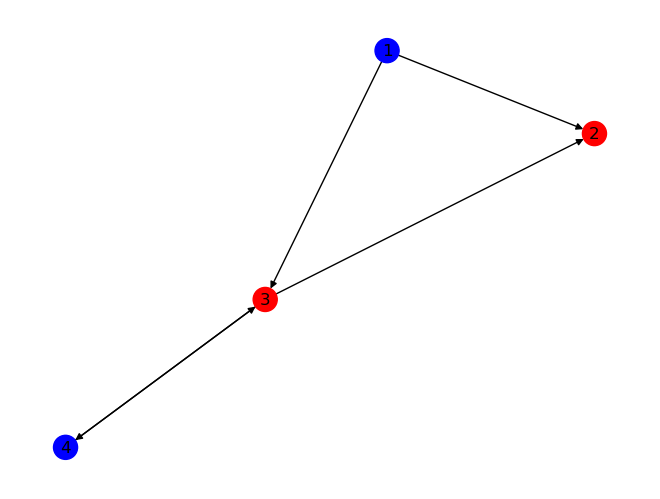

In [15]:
# using node attributes

nx.draw(dG,
        with_labels=True,
        node_color=nx.get_node_attributes(dG, "color").values())

Of course, edges can have attributes too:

In [16]:
dG.edges[(1, 2)]['weight']=1.0
dG.edges[(1, 3)]['weight']=3.0
dG.edges[(3, 2)]['weight']=5.0
dG.edges[(3, 4)]['weight']=10.0
dG.edges[(4, 3)]['weight']=0.5

In [17]:
# see them
dG.edges.data()

OutEdgeDataView([(1, 2, {'weight': 1.0}), (1, 3, {'weight': 3.0}), (3, 2, {'weight': 5.0}), (3, 4, {'weight': 10.0}), (4, 3, {'weight': 0.5})])

Let me add another attribute conditional on another attribute:

In [18]:
# if
{edge:'magenta' if weight<=1 else 'grey' for edge,weight in nx.get_edge_attributes(dG, "weight").items()}

{(1, 2): 'magenta',
 (1, 3): 'grey',
 (3, 2): 'grey',
 (3, 4): 'grey',
 (4, 3): 'magenta'}

In [19]:
# then
colorEdges={edge:'magenta' if weight<=1 else 'yellow' for edge,weight in nx.get_edge_attributes(dG, "weight").items()}
nx.set_edge_attributes(dG,values=colorEdges,name='color')

In [20]:
# see edges and attributes
dG.edges.data()

OutEdgeDataView([(1, 2, {'weight': 1.0, 'color': 'magenta'}), (1, 3, {'weight': 3.0, 'color': 'yellow'}), (3, 2, {'weight': 5.0, 'color': 'yellow'}), (3, 4, {'weight': 10.0, 'color': 'yellow'}), (4, 3, {'weight': 0.5, 'color': 'magenta'})])

Let's use edge attributes:

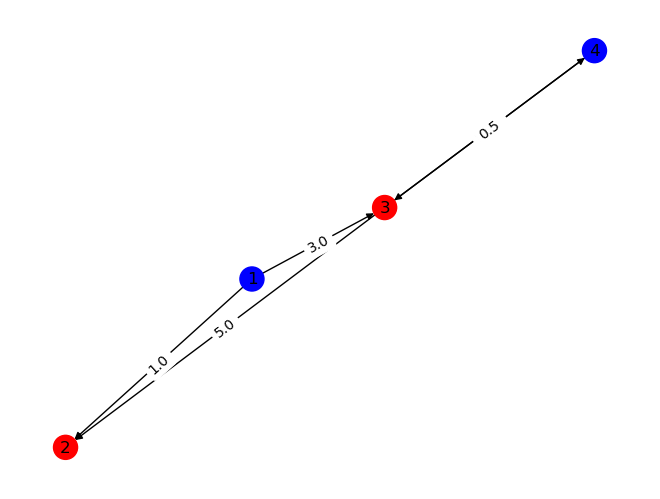

In [21]:
# use the edge attributes
# add labels to edges
            
pos = nx.spring_layout(dG) # position of the nodes

nx.draw(dG,
        pos, # using "position"
        with_labels=True,
        node_color=nx.get_node_attributes(dG, "color").values())

# adding labels
final_dG=nx.draw_networkx_edge_labels(dG,pos,edge_labels=nx.get_edge_attributes(dG,'weight'))

We can also use:

* The color of edges:

In [22]:
nx.get_edge_attributes(dG,'color').values()

dict_values(['magenta', 'yellow', 'yellow', 'yellow', 'magenta'])

* the width of edges:

In [23]:
nx.get_edge_attributes(dG,'weight').values()

dict_values([1.0, 3.0, 5.0, 10.0, 0.5])

See that here:

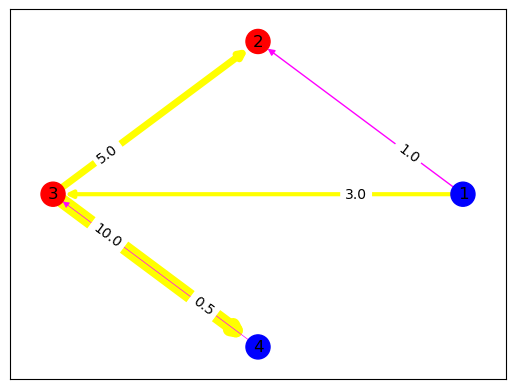

In [24]:
pos = nx.circular_layout(dG) 

# draw nodes first
nx.draw_networkx_nodes(dG,pos,
                       node_color=nx.get_node_attributes(dG,'color').values())
# draw edges
nx.draw_networkx_edges(dG, pos,width=list(nx.get_edge_attributes(dG,'weight').values()), # values as list
                       edge_color= nx.get_edge_attributes(dG,'color').values())
# draw node labels
nx.draw_networkx_labels(dG, pos)

final_dG=nx.draw_networkx_edge_labels(dG,pos,label_pos=0.25,
                               edge_labels=nx.get_edge_attributes(dG,'weight'))

## The bipartite network

This is a different way to see a relationship. Think about _being an actor_ in a film:

* These would be the ones acting:

In [25]:
actor=['Leonardo DiCaprio', 'Tom Hanks', 'Tom Hanks', 'Leonardo DiCaprio', 'Al Pacino', 'Matt Damon',
 'Christian Bale', 'Robert De Niro', 'Al Pacino', 'Dustin Hoffman', 'Dustin Hoffman', 'Jack Nicholson',
 'Christian Bale', 'Jack Nicholson', 'Matt Damon', 'Leonardo DiCaprio', 'Tom Hardy', 'Robert De Niro',
 'Robin Williams', 'Tom Hardy', 'Robin Williams', 'Robin Williams', 'Christian Bale', 'Leonardo DiCaprio',
 'Morgan Freeman', 'Morgan Freeman','Robert De Niro', 'Al Pacino','Robert De Niro', 'Al Pacino']

* These would be the movies:

In [26]:
movie=['The Departed', 'Saving Private Ryan', 'Catch Me If You Can', 'The Revenant',
 'The Godfather Part II', 'Good Will Hunting', 'The Dark Knight Rises', 'Awakenings', 'Insomnia',
 'Empire of the Sun', 'Catch Me If You Can', 'The Bucket List', 'Batman Begins', 'The Departed', 'Saving Private Ryan',
 'Catch Me If You Can', 'The Revenant', 'The Godfather Part II', 'Good Will Hunting',
 'The Dark Knight Rises', 'Awakenings', 'Insomnia', 'Empire of the Sun', 'Catch Me If You Can',
 'The Bucket List', 'Batman Begins','The Irishman','The Irishman','Heat','Heat']

We can make pairs like this:

In [27]:
actor_movie=[('Leonardo DiCaprio', 'The Departed'),
 ('Tom Hanks', 'Saving Private Ryan'),
 ('Tom Hanks', 'Catch Me If You Can'),
 ('Leonardo DiCaprio', 'The Revenant'),
 ('Al Pacino', 'The Godfather Part II'),
 ('Matt Damon', 'Good Will Hunting'),
 ('Christian Bale', 'The Dark Knight Rises'),
 ('Robert De Niro', 'Awakenings'),
 ('Al Pacino', 'Insomnia'),
 ('Dustin Hoffman', 'Empire of the Sun'),
 ('Dustin Hoffman', 'Catch Me If You Can'),
 ('Jack Nicholson', 'The Bucket List'),
 ('Christian Bale', 'Batman Begins'),
 ('Jack Nicholson', 'The Departed'),
 ('Matt Damon', 'Saving Private Ryan'),
 ('Leonardo DiCaprio', 'Catch Me If You Can'),
 ('Tom Hardy', 'The Revenant'),
 ('Robert De Niro', 'The Godfather Part II'),
 ('Robin Williams', 'Good Will Hunting'),
 ('Tom Hardy', 'The Dark Knight Rises'),
 ('Robin Williams', 'Awakenings'),
 ('Robin Williams', 'Insomnia'),
 ('Christian Bale', 'Empire of the Sun'),
 ('Leonardo DiCaprio', 'Catch Me If You Can'),
 ('Morgan Freeman', 'The Bucket List'),
 ('Morgan Freeman', 'Batman Begins'),
('Robert De Niro', 'Heat'),
 ('Al Pacino', 'Heat'),
('Robert De Niro', 'The Irishman'),
 ('Al Pacino', 'The Irishman')]

# here
actor_movie

[('Leonardo DiCaprio', 'The Departed'),
 ('Tom Hanks', 'Saving Private Ryan'),
 ('Tom Hanks', 'Catch Me If You Can'),
 ('Leonardo DiCaprio', 'The Revenant'),
 ('Al Pacino', 'The Godfather Part II'),
 ('Matt Damon', 'Good Will Hunting'),
 ('Christian Bale', 'The Dark Knight Rises'),
 ('Robert De Niro', 'Awakenings'),
 ('Al Pacino', 'Insomnia'),
 ('Dustin Hoffman', 'Empire of the Sun'),
 ('Dustin Hoffman', 'Catch Me If You Can'),
 ('Jack Nicholson', 'The Bucket List'),
 ('Christian Bale', 'Batman Begins'),
 ('Jack Nicholson', 'The Departed'),
 ('Matt Damon', 'Saving Private Ryan'),
 ('Leonardo DiCaprio', 'Catch Me If You Can'),
 ('Tom Hardy', 'The Revenant'),
 ('Robert De Niro', 'The Godfather Part II'),
 ('Robin Williams', 'Good Will Hunting'),
 ('Tom Hardy', 'The Dark Knight Rises'),
 ('Robin Williams', 'Awakenings'),
 ('Robin Williams', 'Insomnia'),
 ('Christian Bale', 'Empire of the Sun'),
 ('Leonardo DiCaprio', 'Catch Me If You Can'),
 ('Morgan Freeman', 'The Bucket List'),
 ('Morga

The previous list of pairs look like edges. Then, let's make and draw a network:

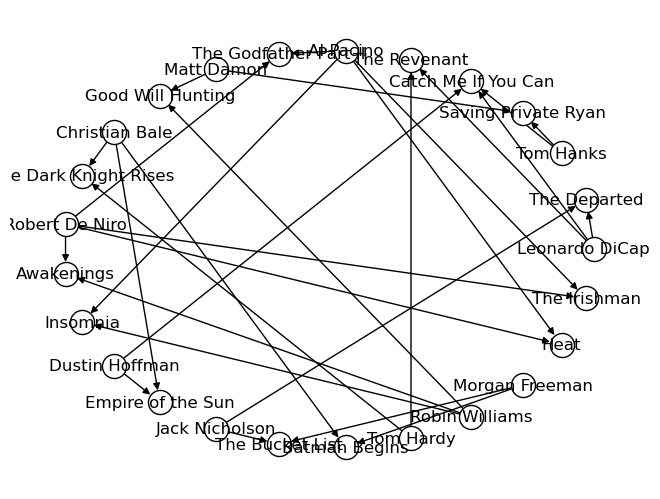

In [28]:
# create DIRECTED graph
dG_actmovie = nx.DiGraph()

# create nodes and edges
dG_actmovie.add_edges_from(actor_movie)

# drawing
nx.draw_circular(dG_actmovie,with_labels=True,node_color='white',edgecolors='black')

You are creating a graph but it will not be useful. 

When you have a structure 'childNode'->'parentNode', you have a **bipartite graph**. Let me show you how to create one:

In [29]:
from networkx.algorithms import bipartite 

# this is undirected
bp_actmovie = nx.Graph()

# this is new:
bp_actmovie.add_nodes_from(actor, bipartite=0) # Add the node attribute "bipartite"
bp_actmovie.add_nodes_from(movie, bipartite=1)

# this is not new
bp_actmovie.add_edges_from(actor_movie)

We have a a graph. It seems not different:

In [30]:
bp_actmovie

But the **bipartite** from **networkx.algorithms** will prove useful:

* Differentiate the node roles in the bipartite graph:

In [31]:
childNode,parentNode = bipartite.sets(bp_actmovie)

In [32]:
parentNode

{'Awakenings',
 'Batman Begins',
 'Catch Me If You Can',
 'Empire of the Sun',
 'Good Will Hunting',
 'Heat',
 'Insomnia',
 'Saving Private Ryan',
 'The Bucket List',
 'The Dark Knight Rises',
 'The Departed',
 'The Godfather Part II',
 'The Irishman',
 'The Revenant'}

In [33]:
childNode

{'Al Pacino',
 'Christian Bale',
 'Dustin Hoffman',
 'Jack Nicholson',
 'Leonardo DiCaprio',
 'Matt Damon',
 'Morgan Freeman',
 'Robert De Niro',
 'Robin Williams',
 'Tom Hanks',
 'Tom Hardy'}

* Draw a bipartite graph

In [34]:
# remember
nx.get_node_attributes(bp_actmovie,'bipartite')

{'Leonardo DiCaprio': 0,
 'Tom Hanks': 0,
 'Al Pacino': 0,
 'Matt Damon': 0,
 'Christian Bale': 0,
 'Robert De Niro': 0,
 'Dustin Hoffman': 0,
 'Jack Nicholson': 0,
 'Tom Hardy': 0,
 'Robin Williams': 0,
 'Morgan Freeman': 0,
 'The Departed': 1,
 'Saving Private Ryan': 1,
 'Catch Me If You Can': 1,
 'The Revenant': 1,
 'The Godfather Part II': 1,
 'Good Will Hunting': 1,
 'The Dark Knight Rises': 1,
 'Awakenings': 1,
 'Insomnia': 1,
 'Empire of the Sun': 1,
 'The Bucket List': 1,
 'Batman Begins': 1,
 'The Irishman': 1,
 'Heat': 1}

Assign color to node:

In [35]:
# dict saved a 'colorDict'
colorNodes={node:'yellow' if bp==0 else 'pink' for node,bp in nx.get_node_attributes(bp_actmovie, "bipartite").items()}
nx.set_node_attributes(bp_actmovie, colorNodes, "color")

Draw the graph:

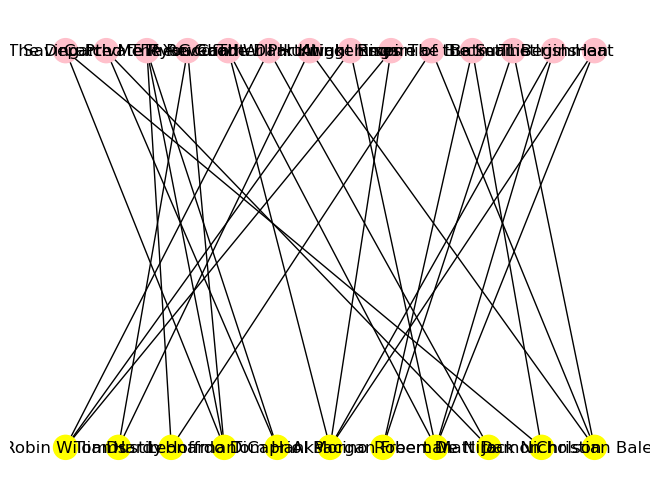

In [36]:
# this is new
pos = nx.bipartite_layout(bp_actmovie, childNode,align='horizontal',aspect_ratio=1)

# not new
nx.draw(bp_actmovie, pos=pos, with_labels=True, node_color = nx.get_node_attributes(bp_actmovie,'color').values())

The above is difficult to understand, we could do some changes:

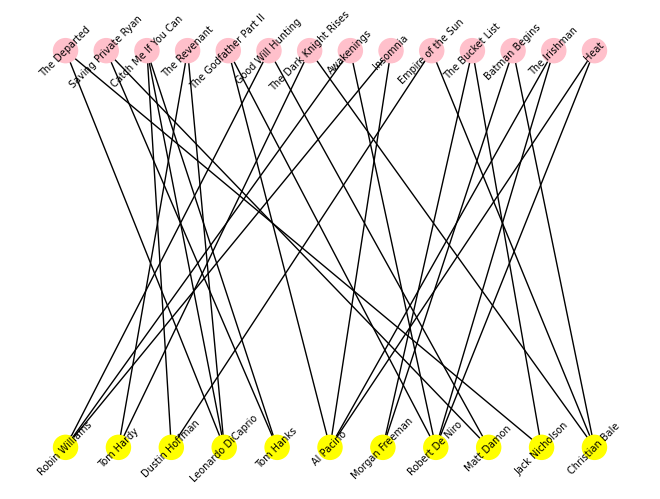

In [37]:
nx.draw(bp_actmovie, pos,node_color = nx.get_node_attributes(bp_actmovie,'color').values())

# this is new
text =nx.draw_networkx_labels(bp_actmovie, pos=pos, font_size=7)
for _, t in text.items():
    t.set_rotation(45) 

The most important: project the bipartite into a regular graph:

In [38]:
actors_proyected=bipartite.weighted_projected_graph(bp_actmovie, childNode)
actors_proyected.edges.data()

EdgeDataView([('Robin Williams', 'Al Pacino', {'weight': 1}), ('Robin Williams', 'Matt Damon', {'weight': 1}), ('Robin Williams', 'Robert De Niro', {'weight': 1}), ('Tom Hardy', 'Christian Bale', {'weight': 1}), ('Tom Hardy', 'Leonardo DiCaprio', {'weight': 1}), ('Dustin Hoffman', 'Tom Hanks', {'weight': 1}), ('Dustin Hoffman', 'Christian Bale', {'weight': 1}), ('Dustin Hoffman', 'Leonardo DiCaprio', {'weight': 1}), ('Leonardo DiCaprio', 'Tom Hanks', {'weight': 1}), ('Leonardo DiCaprio', 'Jack Nicholson', {'weight': 1}), ('Tom Hanks', 'Matt Damon', {'weight': 1}), ('Al Pacino', 'Robert De Niro', {'weight': 3}), ('Morgan Freeman', 'Jack Nicholson', {'weight': 1}), ('Morgan Freeman', 'Christian Bale', {'weight': 1})])

Now, we can see relationships between actors, based on previous appearances:

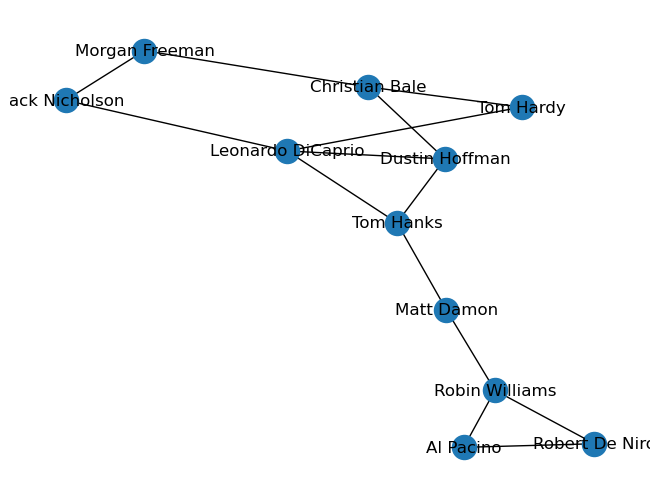

In [39]:
nx.draw(actors_proyected,with_labels=True)

Here, you can see the edge width base on weight attribute:

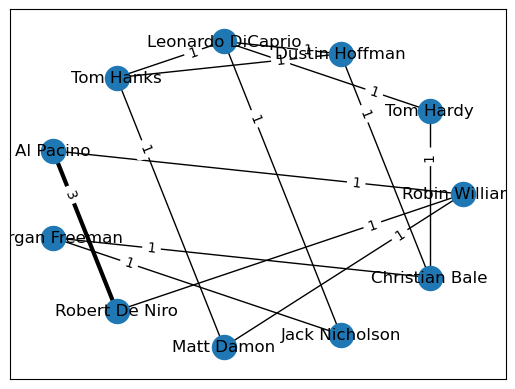

In [40]:
pos = nx.circular_layout(actors_proyected) 
# draw nodes first
nx.draw_networkx_nodes(actors_proyected,pos)
# draw edges
nx.draw_networkx_edges(actors_proyected,pos, 
                       width=list(nx.get_edge_attributes(actors_proyected,'weight').values()))
# draw node labels
nx.draw_networkx_labels(actors_proyected, pos)

nx.draw_networkx_edge_labels(actors_proyected,pos,label_pos=0.25,
                               edge_labels=nx.get_edge_attributes(actors_proyected,'weight'));

# Reading graphs from files

Few times we will input data from the keyboard as we did above; but upload them from an external file. 

I have the same data we were using above in spreadsheets; including attributes for the  data that will create the directed graph:

In [41]:
from IPython.display import IFrame
IFrame("https://docs.google.com/spreadsheets/d/e/2PACX-1vQvLe4eaHdN5QbzXTodOVynN5oW5st_d7_fmaWHmrlUcvopi2kR2P0j0Q96C8r0W6JcdOPXOzVfIoSD/pubhtml",600,350)

What do we have here:

* **G** was undirected, now it  will be created from  **edgelist_u** OR **adjacency_u**.
* **dG** was directed, now it  will be created from  **edgelist_d** OR **adjacency_d**.
* **bp_actmovie**, now it  will be created from  **bipartite**.

Notice also that:
* **edgelist_u** / **adjacency_u** do not have data for node attributes nor for edge attributes. By default node attributes will be empty, but edge attributes will include the attribute 'weight' with value 1.
* **edgelist_d** / **adjacency_d** do have attributes for nodes and edges. Notice that **edgelist_d** can have more attributes than 'weight' for the edges, but **adjacency_d** can only represent the 'weight' for the edges. Both cases require an extra data frame for the node attributes.
* **bipartite** is just a data frame with a pair of columns, you can not have the edge attributes there, those will be computed computationally. We also need here an extra data frame with node attributes.


All those tables are in one excel file, which we can open table by table as data frames.

* The data to replicate **G**:

In [42]:
# reading in
import pandas as pd
LinkToData="https://github.com/DACSS-CSSmeths/Networks_intro/raw/refs/heads/main/casesData/graphFormats.xlsx"
edgelist_u = pd.read_excel(LinkToData,
                           sheet_name='edgelist_u') # name of the sheet

# see the data frame
edgelist_u

,source,target
0,1,2
1,1,5
2,2,3
3,2,5
4,3,4
5,4,5
6,4,6


Networkx can creat a network if your data frame has those columns names (source and target):

In [43]:
graph_edgelist_u=nx.from_pandas_edgelist(edgelist_u)

We may open the adjacency matrix the same way:

In [44]:
adjacency_u = pd.read_excel(LinkToData,
                            index_col=0, # VERY IMPORTANT!!!!!!!!!!!!!!!!!
                            sheet_name='adjacency_u') 
# see the data frame
adjacency_u

,1,2,3,4,5,6
1,0,1,0,0,1,0
2,1,0,1,0,1,0
3,0,1,0,1,0,0
4,0,0,1,0,1,1
5,1,1,0,1,0,0
6,0,0,0,1,0,0


And here, we turn it into a graph:

In [45]:
graph_adjacency_u = nx.from_pandas_adjacency(adjacency_u)

* The data to replicate **dG**:

In [46]:
edgelist_d = pd.read_excel(LinkToData,sheet_name='edgelist_d') 
edgelist_d

,source,target,weight,color
0,1,2,1.0,magenta
1,1,3,3.0,grey
2,3,2,5.0,grey
3,3,4,10.0,grey
4,4,3,0.5,magenta


In [47]:
adjacency_d = pd.read_excel(LinkToData,sheet_name='adjacency_d',index_col=0) 
adjacency_d

,1,2,3,4
1,0,1,3.0,0
2,0,0,0.0,0
3,0,5,0.0,10
4,0,0,0.5,0


Now, turning those data frames into graphs:

In [48]:
graph_edgelist_d=nx.from_pandas_edgelist(edgelist_d,edge_attr=True,
                                         create_using=nx.DiGraph) # here!!
# see edges
graph_edgelist_d.edges.data()

OutEdgeDataView([(1, 2, {'weight': 1.0, 'color': 'magenta'}), (1, 3, {'weight': 3.0, 'color': 'grey'}), (3, 2, {'weight': 5.0, 'color': 'grey'}), (3, 4, {'weight': 10.0, 'color': 'grey'}), (4, 3, {'weight': 0.5, 'color': 'magenta'})])

In [49]:
graph_adjacency_d = nx.from_pandas_adjacency(adjacency_d,
                                             create_using=nx.DiGraph) # here!!
graph_adjacency_d.edges.data()

OutEdgeDataView([(1, 2, {'weight': 1.0}), (1, 3, {'weight': 3.0}), (3, 2, {'weight': 5.0}), (3, 4, {'weight': 10.0}), (4, 3, {'weight': 0.5})])

Here, you see what I meant about the advantage of edgelists to represent attributes over adjacency matrices.

Above, I showed you that the edge attributes were included. 

How do we add the attributes to the nodes?

Let's pick one graph, _graph_adjacency_d_, to add the node attributes:

In [50]:
graph_adjacency_d.nodes.data()

NodeDataView({1: {}, 2: {}, 3: {}, 4: {}})

In [51]:
# read the table with attributes
attr_d=pd.read_excel(LinkToData,sheet_name='attributes_d') 
attr_d

,node,sex,color
0,1,male,blue
1,2,female,red
2,3,female,red
3,4,male,blue


We can build a dictionary of attributes as usual:

In [52]:
{n:s for n,s in zip(attr_d.node,attr_d.sex)}

{1: 'male', 2: 'female', 3: 'female', 4: 'male'}

So this is the way!

In [53]:
attrDic_sex={n:s for n,s in zip(attr_d.node,attr_d.sex)}
attrDic_col={n:s for n,s in zip(attr_d.node,attr_d.color)}
nx.set_node_attributes(graph_adjacency_d,attrDic_col , "sex")
nx.set_node_attributes(graph_adjacency_d,attrDic_sex , "color")

Ready:

In [54]:
graph_adjacency_d.nodes.data()

NodeDataView({1: {'sex': 'blue', 'color': 'male'}, 2: {'sex': 'red', 'color': 'female'}, 3: {'sex': 'red', 'color': 'female'}, 4: {'sex': 'blue', 'color': 'male'}})

Up to here:

* We created undirected graph **G** by typing the nodes and edges. We created the same graph in two ways by reading data from a link, using edgelist and an adjacency matrix; we named them **graph_edgelist_u** and **graph_adjacency_u**, respectively.
* We created undirected graph **dG** by typing the nodes and edges. We created the same graph in two ways by reading data from a link, using edgelist and an adjacency matrix; we named them **graph_edgelist_d** and **graph_adjacency_d**, respectively.

* The data to replicate **bipartite**: This may need some work.

In general, the data may come like this:

In [55]:
graph_bp = pd.read_excel(LinkToData,
                         sheet_name='bipartite') 

graph_bp

,movie,cast
0,Awakenings,"Robert De Niro, Robin Williams"
1,Batman Begins,"Christian Bale, Morgan Freeman"
2,Catch Me If You Can,"Tom Hanks, Leonardo DiCaprio"
3,Catch Me If You Can,"Dustin Hoffman, Leonardo DiCaprio"
4,Empire of the Sun,"Dustin Hoffman, Christian Bale"
5,Good Will Hunting,"Matt Damon, Robin Williams"
6,Heat,"Al Pacino, Robert De Niro"
7,Insomnia,"Al Pacino, Robin Williams"
8,Saving Private Ryan,"Tom Hanks, Matt Damon"
9,The Bucket List,"Jack Nicholson, Morgan Freeman"


To follow the same steps as before, notice 'graph_bp.cast' is a column (series):

In [56]:
graph_bp.cast

0        Robert De Niro, Robin Williams
1        Christian Bale, Morgan Freeman
2          Tom Hanks, Leonardo DiCaprio
3     Dustin Hoffman, Leonardo DiCaprio
4        Dustin Hoffman, Christian Bale
5            Matt Damon, Robin Williams
6             Al Pacino, Robert De Niro
7             Al Pacino, Robin Williams
8                 Tom Hanks, Matt Damon
9        Jack Nicholson, Morgan Freeman
10            Christian Bale, Tom Hardy
11    Leonardo DiCaprio, Jack Nicholson
12            Al Pacino, Robert De Niro
13            Al Pacino, Robert De Niro
14         Leonardo DiCaprio, Tom Hardy
Name: cast, dtype: object

In [57]:
# a cell
graph_bp.cast[0]

'Robert De Niro, Robin Williams'

In [58]:
# the previous as list

graph_bp.cast[0].split(', ')

['Robert De Niro', 'Robin Williams']

Here, the column with each cell as a list:

In [59]:
graph_bp.cast.str.split(',')

0        [Robert De Niro,  Robin Williams]
1        [Christian Bale,  Morgan Freeman]
2          [Tom Hanks,  Leonardo DiCaprio]
3     [Dustin Hoffman,  Leonardo DiCaprio]
4        [Dustin Hoffman,  Christian Bale]
5            [Matt Damon,  Robin Williams]
6             [Al Pacino,  Robert De Niro]
7             [Al Pacino,  Robin Williams]
8                 [Tom Hanks,  Matt Damon]
9        [Jack Nicholson,  Morgan Freeman]
10            [Christian Bale,  Tom Hardy]
11    [Leonardo DiCaprio,  Jack Nicholson]
12            [Al Pacino,  Robert De Niro]
13            [Al Pacino,  Robert De Niro]
14         [Leonardo DiCaprio,  Tom Hardy]
Name: cast, dtype: object

Now, notice the magic of **explode()**:

In [60]:
graph_bp.cast.str.split(',').explode()

0         Robert De Niro
0         Robin Williams
1         Christian Bale
1         Morgan Freeman
2              Tom Hanks
2      Leonardo DiCaprio
3         Dustin Hoffman
3      Leonardo DiCaprio
4         Dustin Hoffman
4         Christian Bale
5             Matt Damon
5         Robin Williams
6              Al Pacino
6         Robert De Niro
7              Al Pacino
7         Robin Williams
8              Tom Hanks
8             Matt Damon
9         Jack Nicholson
9         Morgan Freeman
10        Christian Bale
10             Tom Hardy
11     Leonardo DiCaprio
11        Jack Nicholson
12             Al Pacino
12        Robert De Niro
13             Al Pacino
13        Robert De Niro
14     Leonardo DiCaprio
14             Tom Hardy
Name: cast, dtype: object

The best part is that the indexes are kept when 'exploding' the series of lists. The pandas **concat()** will use that this way:

In [61]:
data_forBP=pd.concat([graph_bp.movie,
                      graph_bp.cast.str.split(', ').explode()],axis=1)
data_forBP

,movie,cast
0,Awakenings,Robert De Niro
0,Awakenings,Robin Williams
1,Batman Begins,Christian Bale
1,Batman Begins,Morgan Freeman
2,Catch Me If You Can,Tom Hanks
2,Catch Me If You Can,Leonardo DiCaprio
3,Catch Me If You Can,Dustin Hoffman
3,Catch Me If You Can,Leonardo DiCaprio
4,Empire of the Sun,Dustin Hoffman
4,Empire of the Sun,Christian Bale


Now, we have the two lists of nodes:

In [62]:
actors_file=data_forBP.cast.to_list()
movies_file=data_forBP.movie.to_list()

And the edges:

In [63]:
actor_movie_file=[(a,m) for a,m in zip(actors_file,movies_file)]

In [64]:
bp_actmovie_file = nx.Graph()
bp_actmovie_file.add_nodes_from(actors_file, bipartite=0) 
bp_actmovie_file.add_nodes_from(movies_file, bipartite=1)

bp_actmovie_file.add_edges_from(actor_movie_file)
childNode_file,parentNode_file = bipartite.sets(bp_actmovie_file)

Let's see the plot:

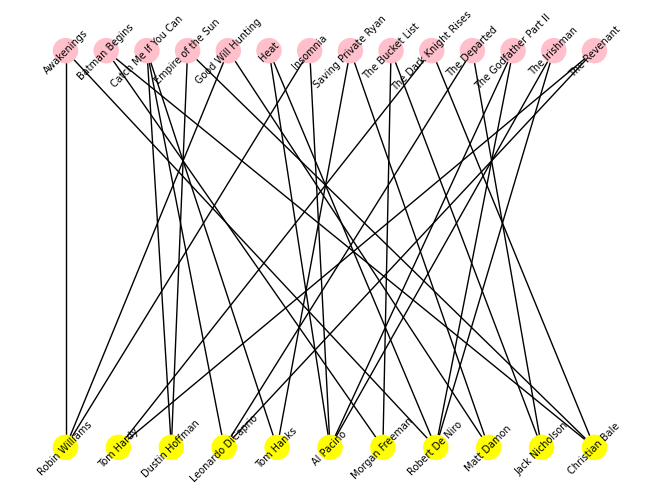

In [65]:
colorNodes={node:'yellow' if bp==0 else 'pink' for node,bp in nx.get_node_attributes(bp_actmovie_file, "bipartite").items()}
nx.set_node_attributes(bp_actmovie_file, colorNodes, "color")
pos = nx.bipartite_layout(bp_actmovie_file, childNode,align='horizontal',aspect_ratio=1)
nx.draw(bp_actmovie_file, pos,node_color = nx.get_node_attributes(bp_actmovie_file,'color').values())
text =nx.draw_networkx_labels(bp_actmovie_file, pos=pos, font_size=7)
for _, t in text.items():
    t.set_rotation(45) 

The most important: getting a network of the actors ('children' set): 

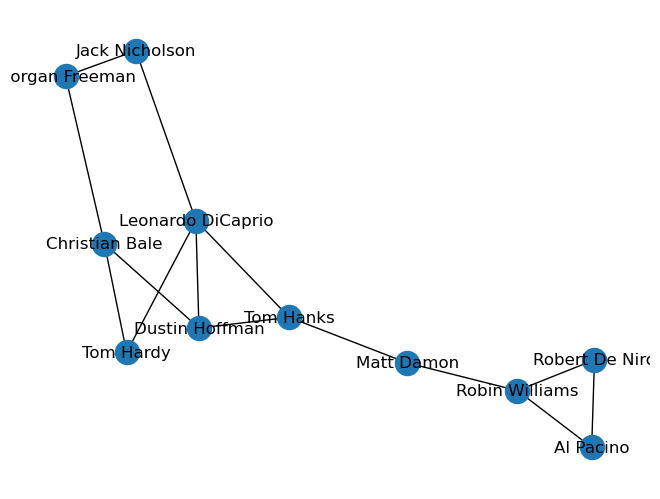

In [66]:
actors_proyected_file=bipartite.weighted_projected_graph(bp_actmovie_file, childNode)
nx.draw(actors_proyected_file,with_labels=True)

This is the right moment to add attributes:

In [67]:
# data for attributes
attr_bp=pd.read_excel(LinkToData,sheet_name='attributes_bp') 
attr_bp

,actor,wonOscar
0,Robert De Niro,1
1,Christian Bale,1
2,Tom Hanks,1
3,Dustin Hoffman,1
4,Matt Damon,0
5,Al Pacino,1
6,Jack Nicholson,1
7,Leonardo DiCaprio,1
8,Robin Williams,1
9,Morgan Freeman,1


In [68]:
# dictionary for attributes
attrDic_oscar={n:s for n,s in zip(attr_bp.actor,attr_bp.wonOscar)}
nx.set_node_attributes(actors_proyected_file,attrDic_oscar , "wonOscar")

In [69]:
# you can see them now:
actors_proyected_file.nodes.data()

NodeDataView({'Robin Williams': {'bipartite': 0, 'color': 'yellow', 'wonOscar': 1}, 'Tom Hardy': {'bipartite': 0, 'color': 'yellow', 'wonOscar': 0}, 'Dustin Hoffman': {'bipartite': 0, 'color': 'yellow', 'wonOscar': 1}, 'Leonardo DiCaprio': {'bipartite': 0, 'color': 'yellow', 'wonOscar': 1}, 'Tom Hanks': {'bipartite': 0, 'color': 'yellow', 'wonOscar': 1}, 'Al Pacino': {'bipartite': 0, 'color': 'yellow', 'wonOscar': 1}, 'Morgan Freeman': {'bipartite': 0, 'color': 'yellow', 'wonOscar': 1}, 'Robert De Niro': {'bipartite': 0, 'color': 'yellow', 'wonOscar': 1}, 'Matt Damon': {'bipartite': 0, 'color': 'yellow', 'wonOscar': 0}, 'Jack Nicholson': {'bipartite': 0, 'color': 'yellow', 'wonOscar': 1}, 'Christian Bale': {'bipartite': 0, 'color': 'yellow', 'wonOscar': 1}})

Remember edges have attributes too ('weight'):

In [70]:
actors_proyected_file.edges.data()

EdgeDataView([('Robin Williams', 'Al Pacino', {'weight': 1}), ('Robin Williams', 'Matt Damon', {'weight': 1}), ('Robin Williams', 'Robert De Niro', {'weight': 1}), ('Tom Hardy', 'Christian Bale', {'weight': 1}), ('Tom Hardy', 'Leonardo DiCaprio', {'weight': 1}), ('Dustin Hoffman', 'Tom Hanks', {'weight': 1}), ('Dustin Hoffman', 'Christian Bale', {'weight': 1}), ('Dustin Hoffman', 'Leonardo DiCaprio', {'weight': 1}), ('Leonardo DiCaprio', 'Tom Hanks', {'weight': 1}), ('Leonardo DiCaprio', 'Jack Nicholson', {'weight': 1}), ('Tom Hanks', 'Matt Damon', {'weight': 1}), ('Al Pacino', 'Robert De Niro', {'weight': 3}), ('Morgan Freeman', 'Jack Nicholson', {'weight': 1}), ('Morgan Freeman', 'Christian Bale', {'weight': 1})])

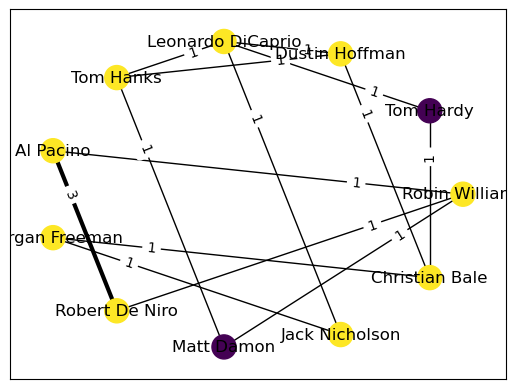

In [71]:
pos = nx.circular_layout(actors_proyected_file) 
# draw nodes first
nx.draw_networkx_nodes(actors_proyected_file,pos,node_color = nx.get_node_attributes(actors_proyected_file,'wonOscar').values())
# draw edges
nx.draw_networkx_edges(actors_proyected_file,pos, 
                       width=list(nx.get_edge_attributes(actors_proyected_file,'weight').values()))
# draw node labels
nx.draw_networkx_labels(actors_proyected_file, pos)

nx.draw_networkx_edge_labels(actors_proyected_file,pos,label_pos=0.25,
                               edge_labels=nx.get_edge_attributes(actors_proyected_file,'weight'));

# Exporting graphs

You should always export a graph once it is created, in order for a graph to be opne on a different tool:

In [72]:
examplesFolder="MyGraphs/" # this folder needs to be created previously on your machine

nx.write_graphml(G, examplesFolder+"css_G.graphml",named_key_ids=True)
nx.write_graphml(dG, examplesFolder+"css_dG.graphml",named_key_ids=True)
nx.write_graphml(actors_proyected_file, examplesFolder+"css_bP.graphml",named_key_ids=True)

# Some Pre Homework

For your homeworks you need to become familiar with some data: 

* [Case 1](case1.html): Data on rich people from Peru.
* [Case 2](case2.html): Data on important people in Seattle.
* [Case 3](case3.html): Data on Soccer players, during the 2022 Fifa World Cup